In [1]:
#Step 1: Load Data file

import pandas as pd
import os
def current_path():
    os.chdir('c:/users/meenakshi ganesh/downloads/python-learn')
    print(os.getcwd())
    print()
current_path()
print(os.getcwd())

import pandas as pd
FilePath = 'c:/users/meenakshi ganesh/downloads/python-learn/Anova_Data.xlsx'
df = pd.read_excel(FilePath, sheet_name='one_way_demo')

c:\users\meenakshi ganesh\downloads\python-learn

c:\users\meenakshi ganesh\downloads\python-learn


ValueError: Worksheet named 'one_way_demo' not found

In [39]:
#viewing loaded data
df = df.loc[:,['Year', 'Company A', 'Company B', 'Company C']]
df

,Year,Company A,Company B,Company C
0,1990,11430.40,11487.40,11415.25
1,1991,11341.15,11468.00,11331.35
2,1992,11245.00,11324.00,11202.00
3,1993,11348.00,11447.25,11301.00
4,1994,11351.10,11393.25,11266.00
5,1995,11383.35,11473.30,11309.80
6,1996,11578.95,11594.70,11511.00
7,1997,11480.40,11576.00,11445.40
8,1998,11449.65,11589.70,11373.00
9,1999,11764.90,11794.45,11350.50


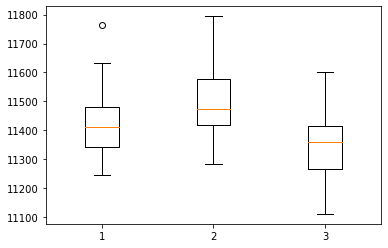

In [41]:
#Exploring Data

# Import libraries
import matplotlib.pyplot as plt
 
# Creating plot
plt.boxplot(df.iloc[:, 1:4])

# show plot
plt.show()

In [50]:
# reshape the dataframe suitable for statsmodels package 
df_melt = pd.melt(df, id_vars =['Year'], value_vars=['Company A', 'Company B', 'Company C'])
# replace column names
df_melt.columns = ['Year','Company', 'Profit']
df_melt

,Year,Company,Profit
0,1990,Company A,11430.40
1,1991,Company A,11341.15
2,1992,Company A,11245.00
3,1993,Company A,11348.00
4,1994,Company A,11351.10
...,...,...,...
58,2006,Company C,11260.00
59,2007,Company C,11404.40
60,2008,Company C,11261.80
61,2009,Company C,11155.35


In [46]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Profit ~ C(Company)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(Company),201957.975556,2.0,6.341615,0.003173
Residual,955393.796667,60.0,NaN,NaN


In [49]:
#post hoc test
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_melt['Profit'], df_melt['Company'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

#false means you have acepted 
# true means 

group1,group2,meandiff,p-adj,lower,upper,reject
Company A,Company B,65.6857,0.2188,-27.8995,159.2709,False
Company A,Company C,-72.9381,0.1555,-166.5233,20.6471,False
Company B,Company C,-138.6238,0.0021,-232.209,-45.0386,True


In [52]:
df_melt.head(40)

,Year,Company,Profit
0,1990,Company A,11430.40
1,1991,Company A,11341.15
2,1992,Company A,11245.00
3,1993,Company A,11348.00
4,1994,Company A,11351.10
5,1995,Company A,11383.35
6,1996,Company A,11578.95
7,1997,Company A,11480.40
8,1998,Company A,11449.65
9,1999,Company A,11764.90
